<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Spring2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)
spring_index = set()

In [ ]:
for i in range(0,len(df),24*60//5):
  month = int(df.loc[i]["time"][5:7])

  if (3 <= month <= 5):
    spring_index.add(i)

In [ ]:
all_index = list()
for i in spring_index:
  for j in range(24*60//5):
    all_index.append(i+j)

In [ ]:
x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)
df_corr = df2.corr()
arr = df_corr.copy()
arr

,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,drive/MyDrive/2017_v1/880_0_2017.csv,drive/MyDrive/2017_v1/821_1_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
drive/MyDrive/2017_v1/739_1_2017.csv,1.000000,0.461150,0.376784,0.393439,0.620704,0.334109,0.166634,0.395830,0.377896,0.524089,0.400919,0.627818,0.597102,0.277659,0.520032,0.783401,0.386351,0.395710,0.265352,0.636892,0.539319,0.370913,0.396394,0.550658,0.511567,0.381130,0.680602,0.623031,0.544974,0.617447,0.214386,0.172259,0.356774,0.408423,0.469847,0.003672,0.528646,0.369561,0.449485,-0.179443,...,0.329677,0.307961,0.395033,0.356924,0.401067,0.704381,0.398527,-0.208663,0.395982,0.492932,0.395479,0.473958,0.286743,0.445277,0.265673,0.091461,0.451482,0.395848,0.249068,0.466439,0.636654,0.443554,-0.024271,0.662455,0.096307,0.663287,0.331649,0.157535,0.708325,0.289806,0.401705,0.395863,0.445072,0.395982,0.617661,0.617786,0.309890,0.327593,0.273104,0.382815
drive/MyDrive/2017_v1/482_1_2017.csv,0.461150,1.000000,0.605023,0.582098,0.586674,0.570827,0.321317,0.635042,0.605361,0.785648,0.642191,0.457969,0.729549,0.361824,0.707140,0.376618,0.628305,0.635043,0.484290,0.406666,0.675924,0.550113,0.633627,0.768028,0.384

In [ ]:
cols = list(arr.columns)
corr = np.array(arr)
corr

array([[1.        , 0.46114989, 0.3767839 , ..., 0.32759335, 0.27310369,
        0.38281541],
       [0.46114989, 1.        , 0.60502297, ..., 0.51900519, 0.24555564,
        0.57142465],
       [0.3767839 , 0.60502297, 1.        , ..., 0.80523135, 0.31102258,
        0.7604782 ],
       ...,
       [0.32759335, 0.51900519, 0.80523135, ..., 1.        , 0.26460765,
        0.67051688],
       [0.27310369, 0.24555564, 0.31102258, ..., 0.26460765, 1.        ,
        0.29285682],
       [0.38281541, 0.57142465, 0.7604782 , ..., 0.67051688, 0.29285682,
        1.        ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

3

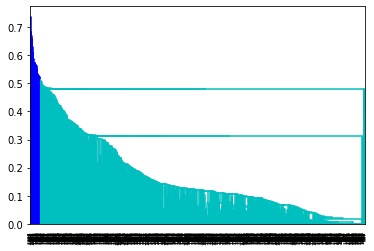

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1464
cluster:2 len:1
cluster:3 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

58

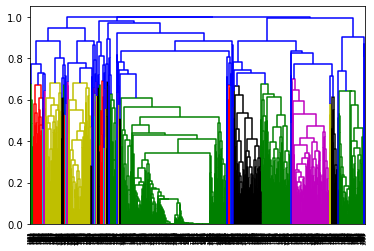

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:44 len:117
cluster:53 len:112
cluster:35 len:467
cluster:45 len:130
cluster:2 len:40
cluster:49 len:165
cluster:40 len:1
cluster:11 len:98
cluster:26 len:31
cluster:51 len:27
cluster:10 len:9
cluster:38 len:14
cluster:5 len:71
cluster:24 len:5
cluster:21 len:17
cluster:31 len:1
cluster:23 len:6
cluster:14 len:8
cluster:7 len:4
cluster:1 len:17
cluster:22 len:2
cluster:30 len:4
cluster:9 len:6
cluster:19 len:6
cluster:50 len:11
cluster:20 len:6
cluster:4 len:9
cluster:6 len:7
cluster:25 len:8
cluster:33 len:4
cluster:36 len:1
cluster:41 len:2
cluster:55 len:1
cluster:13 len:5
cluster:15 len:4
cluster:32 len:4
cluster:43 len:4
cluster:16 len:5
cluster:58 len:1
cluster:57 len:1
cluster:34 len:2
cluster:27 len:1
cluster:8 len:5
cluster:18 len:2
cluster:39 len:6
cluster:12 len:2
cluster:47 len:2
cluster:3 len:2
cluster:37 len:1
cluster:48 len:3
cluster:54 len:1
cluster:56 len:1
cluster:29 len:2
cluster:17 len:1
cluster:28 len:1
cluster:52 len:1
cluster:42 len:1
cluster:46 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SpringCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SpringCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

35

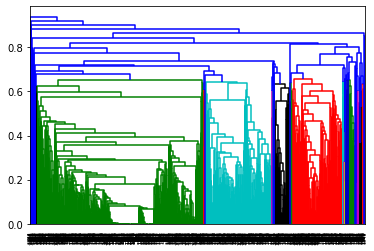

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:14 len:298
cluster:13 len:741
cluster:19 len:230
cluster:18 len:1
cluster:16 len:70
cluster:29 len:13
cluster:15 len:5
cluster:23 len:32
cluster:30 len:1
cluster:28 len:8
cluster:20 len:8
cluster:27 len:14
cluster:6 len:4
cluster:12 len:2
cluster:10 len:1
cluster:9 len:2
cluster:4 len:1
cluster:21 len:7
cluster:22 len:9
cluster:24 len:1
cluster:34 len:1
cluster:26 len:2
cluster:8 len:1
cluster:1 len:2
cluster:11 len:1
cluster:31 len:1
cluster:5 len:1
cluster:7 len:2
cluster:25 len:1
cluster:35 len:1
cluster:2 len:1
cluster:32 len:1
cluster:33 len:1
cluster:3 len:1
cluster:17 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SpringWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SpringWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

4

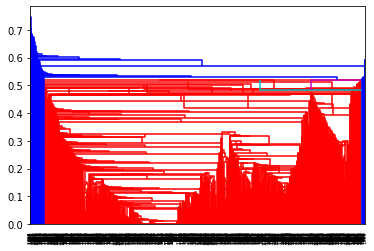

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1463
cluster:2 len:1
cluster:3 len:1
cluster:4 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

20

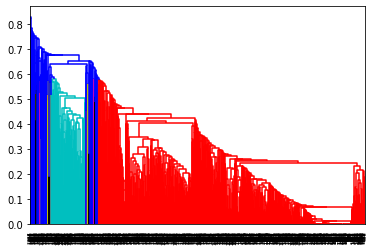

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:8 len:1414
cluster:16 len:1
cluster:7 len:17
cluster:1 len:2
cluster:5 len:4
cluster:6 len:3
cluster:3 len:2
cluster:13 len:1
cluster:4 len:10
cluster:19 len:1
cluster:17 len:1
cluster:2 len:2
cluster:14 len:1
cluster:10 len:1
cluster:9 len:1
cluster:20 len:1
cluster:18 len:1
cluster:11 len:1
cluster:12 len:1
cluster:15 len:1
